## Question 2

### Part (a)

In the codes below, we will run 100 trails of simulation to test the performance of Logistic Regression and LDA.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
np.random.seed(1024)

N = 100
samples = 100
mu1 = 1

def generate_sample(mu=mu1):
    # returns (X,Y) for a trail:
    # sample how many Y should be positive
    Y1 = np.random.binomial(p=0.5, n=100)
    # generate the Y array
    Y = np.hstack([np.ones(Y1), np.zeros(samples-Y1)])
    # generate the X array
    X = np.hstack([np.random.standard_t(1,Y1) + mu,
                   np.random.standard_t(1,samples-Y1)])
    X = np.array([X]).transpose()
    return X, Y

def test_model(model, n, mu=mu1):
    # Run n trails of the given model
    result = []
    for i in range(n):
        # generate train and test data
        trainXY = generate_sample(mu)
        testXY = generate_sample(mu)
        # fit and collect the error
        model.fit(*trainXY)
        result.append(1 - model.score(*testXY))
    return result

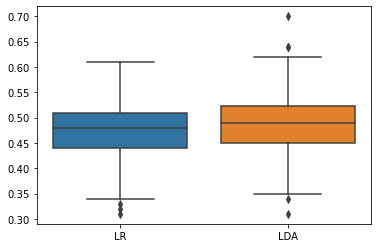

In [2]:
# Run the experiment with mu = 1

lr_error = test_model(LogisticRegression(), 100)
lda_error = test_model(LinearDiscriminantAnalysis(), 100)
result = pd.DataFrame({"LR": lr_error, "LDA": lda_error})
ax = sns.boxplot(data=result)
plt.show()

The mean and variance of the test errors are calculated:

In [3]:
mean_lr = np.mean(lr_error)
var_lr = np.var(lr_error)

mean_lda = np.mean(lda_error)
var_lda = np.var(lda_error)

print(f"The mean of test error for LR is {mean_lr:.2%}, and for LDA is {mean_lda:.2%}.\nThe var of test error for LR is {var_lr:.2%}, and for LDA is {var_lda:.2%}")

The mean of test error for LR is 47.47%, and for LDA is 48.59%.
The var of test error for LR is 0.46%, and for LDA is 0.50%


### Part (b)

We will repeat the procedure with $\mu_1 = 2$ and 3:

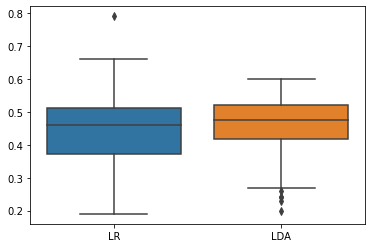

In [4]:
# Run the experiment

lr_error = test_model(LogisticRegression(), 100, mu = 2)
lda_error = test_model(LinearDiscriminantAnalysis(), 100, mu = 2)
result = pd.DataFrame({"LR": lr_error, "LDA": lda_error})
ax = sns.boxplot(data=result)
plt.show()

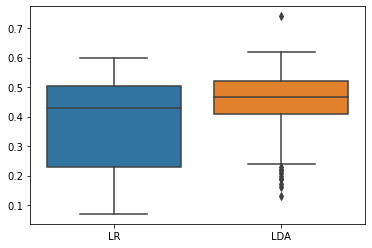

In [5]:
# Run the experiment

lr_error = test_model(LogisticRegression(), 100, mu = 3)
lda_error = test_model(LinearDiscriminantAnalysis(), 100, mu = 3)
result = pd.DataFrame({"LR": lr_error, "LDA": lda_error})
ax = sns.boxplot(data=result)
plt.show()

We can see that as the $\mu_1$ gets larger, the gap between the mean of test error is larger. LR tends to have a smaller mean test error than LDA, but it also has a larger variance. 

## Question 3 on page 368

### part (a)

The sketch is done with the code below:

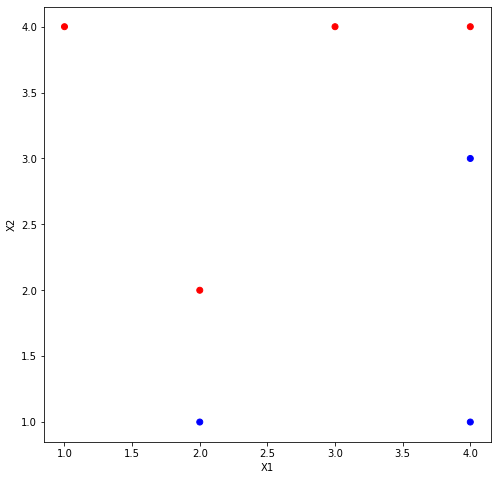

In [6]:
import pandas as pd
data = pd.DataFrame({
    "X1": [3,2,4,1,2,4,4],
    "X2": [4,2,4,4,1,3,1],
    "Y": ["Red"] * 4 + ["Blue"] * 3
})
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x="X1", y = "X2", c="Y", data=data)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

## part (b)

The hyperplane is plotted on the graph, and the equation is:

$$
X1 - X2 - 0.5 = 0
$$

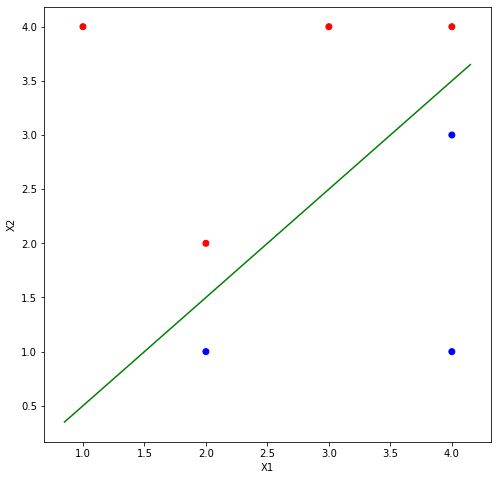

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x="X1", y = "X2", c="Y", data=data)
plt.xlabel("X1")
plt.ylabel("X2")
x_vals = np.array(ax.get_xlim())
y_vals = x_vals - 0.5
plt.plot(x_vals, y_vals, "g")
plt.show()

### part (c)

Given the line's equation in part (b) as $X1 - X2 - 0.5 = 0$, the classification rule is to classify as Red when $-X1 + X2 + 0.5 > 0$ and to classify as Blue when $ - X1 + X2 + 0.5 < 0$.

So the values for $\beta$ are:

- $\beta_0 = 0.5$
- $\beta_1 = -1$
- $\beta_2 = 1$

### Part (d)

The margin is plotted onto the graph with the following code as arrows.

### part (e)

The support vectors are the green dashed lines in the graph below, showing 

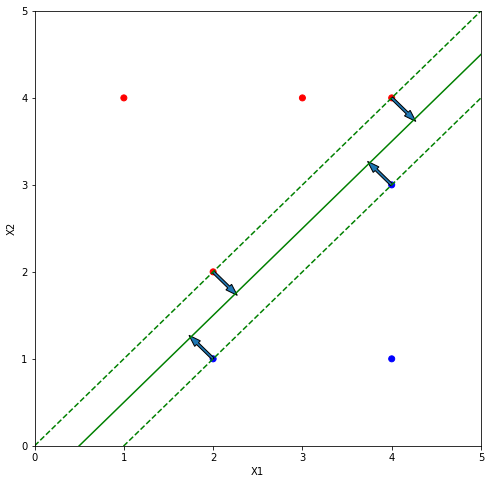

In [8]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x="X1", y = "X2", c="Y", data=data)
plt.xlabel("X1")
plt.ylabel("X2")
ax.set_xlim(0,5)
ax.set_ylim(0,5)
x_vals = np.array(ax.get_xlim())
y_vals = x_vals - 0.5
plt.plot(x_vals, y_vals, "g")
plt.plot(x_vals, y_vals+0.5, "g--")
plt.plot(x_vals, y_vals-0.5, "g--")
# adding the arrows:
plt.arrow(2,2, 0.175, -0.175, width=0.03)
plt.arrow(2,1, -0.175, +0.175, width=0.03)
plt.arrow(4,4, 0.175, -0.175, width=0.03)
plt.arrow(4,3, -0.175, +0.175, width=0.03)
plt.show()

### part (f)

As the 7th observation is not on any support vectors, its slight movement will not affect the maximal margin hyperplane.

### part (g)

Another hyperplane that is not optimal is shown below in the graph, the equation is given as :

$$
X2 - 1.5 = 0
$$

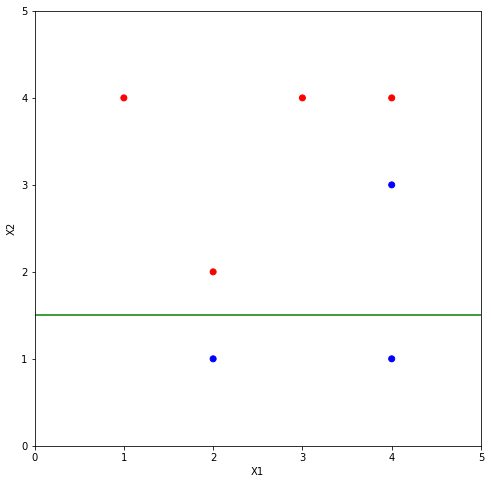

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x="X1", y = "X2", c="Y", data=data)
plt.xlabel("X1")
plt.ylabel("X2")
ax.set_xlim(0,5)
ax.set_ylim(0,5)
x_vals = np.array(ax.get_xlim())
y_vals = 1.5 * np.ones_like(x_vals)
plt.plot(x_vals, y_vals, "g")
plt.show()

### part (h)

By adding a red observation near an originally blue observation, we can make the dataset no longer separable by a hyperplane, as shown below:

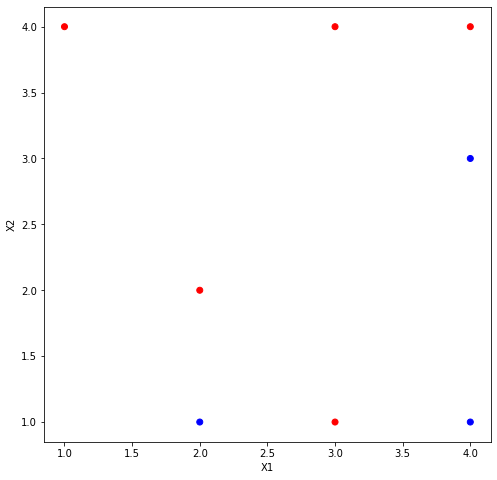

In [10]:
import pandas as pd
data = pd.DataFrame({
    "X1": [3,2,4,1,3,2,4,4],
    "X2": [4,2,4,4,1,1,3,1],
    "Y": ["Red"] * 5 + ["Blue"] * 3
})
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(x="X1", y = "X2", c="Y", data=data)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()